In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
# Set path
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
import matplotlib.pyplot as plt
import mlfast

## FFT based method of extended-source effect

In [3]:
mag_disk = mlfast.mag_fft.magnification_disk()
mag_limb1= mlfast.mag_fft.magnification_limb(1)
mag_limb2= mlfast.mag_fft.magnification_limb(2)

CPU times: user 3.73 ms, sys: 292 µs, total: 4.02 ms
Wall time: 4.4 ms
CPU times: user 3.82 ms, sys: 445 µs, total: 4.26 ms
Wall time: 4.53 ms
CPU times: user 3.26 ms, sys: 77 µs, total: 3.34 ms
Wall time: 3.4 ms


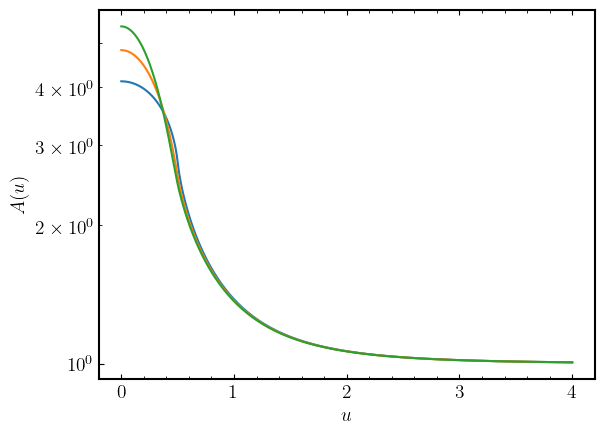

In [4]:
rho = 0.5
u = np.linspace(0.0, 4.0 ,1000)
%time a_disk = mag_disk.A(u, rho)
%time a_limb1 = mag_limb1.A(u, rho)
%time a_limb2 = mag_limb2.A(u, rho)

plt.figure()
plt.xlabel(r'$u$')
plt.ylabel(r'$A(u)$')
plt.yscale('log')
plt.plot(u, a_disk)
plt.plot(u, a_limb1)
plt.plot(u, a_limb2)
plt.show()

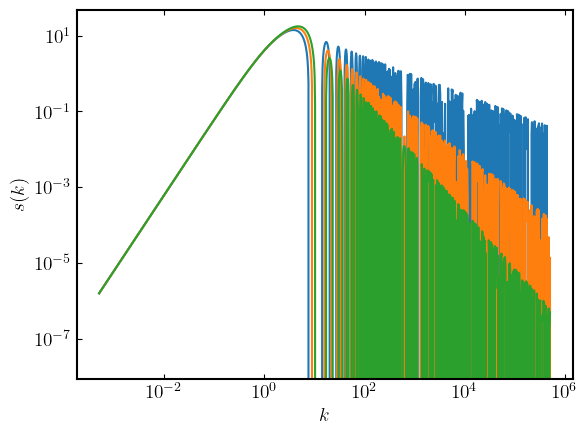

In [5]:
k = mag_disk.k
apk = mag_disk.apk
plt.figure()
plt.xlabel(r'$k$')
plt.ylabel(r'$s(k)$')
plt.loglog(k, apk*k**2*mag_disk.sk(k, rho) )
plt.loglog(k, apk*k**2*mag_limb1.sk(k, rho) )
plt.loglog(k, apk*k**2*mag_limb2.sk(k, rho) )
plt.show()

## FFT-based method of time average

CPU times: user 3.26 ms, sys: 627 µs, total: 3.89 ms
Wall time: 4.62 ms


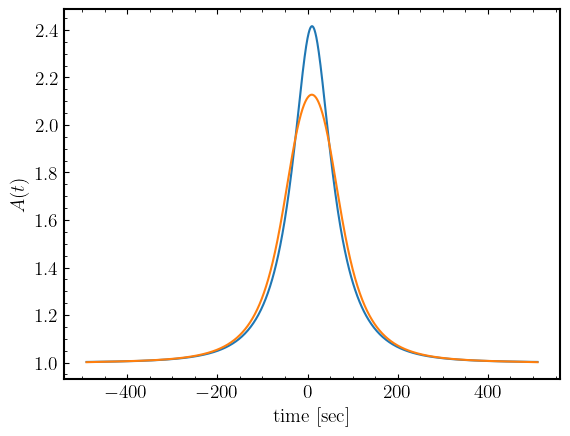

In [6]:
umin = 0.1
tE = 100
t0 = 10.
rho = 0.1

n = 5
t = np.linspace(t0-n*tE, t0+n*tE, 2048) # This grid size guarantees accuracy of 0.3%
u = (umin*2+(t-t0)**2/tE**2)**0.5

# Lightcurve without time averaging
mag = mlfast.mag_fft.magnification_disk()
a = mag.A(u.copy(), rho)

# Lightcurve with time averaging
dt = 100.0
%time a_bar = mlfast.timeave.timeave(t, a, dt, N_pad=100)

plt.figure()
plt.xlabel('time [sec]')
plt.ylabel(r'$A(t)$')
plt.plot(t, a)
plt.plot(t, a_bar)
plt.show()